In [35]:
import numpy as np
# import scipy as scp
import matplotlib.pyplot as plt
import pandas as pd
# import sympy as sym
import sklearn as sk
import seaborn as sns

from sklearn import datasets



In [36]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [37]:
df = datasets.load_diabetes()
x = df.data
y = df.target
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [38]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [39]:
y_train = (pd.DataFrame(y_train))
y_test = pd.DataFrame(y_test)

In [40]:
from sklearn.preprocessing import StandardScaler
def scale_datasets(x_train, x_test):
    standard_scaler = StandardScaler()
    x_train_scaled = pd.DataFrame(standard_scaler.fit_transform(x_train),columns=x_train.columns)
    x_test_scaled = pd.DataFrame(standard_scaler.transform(x_test),columns = x_test.columns)
    return x_train_scaled, x_test_scaled
x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

In [41]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()


In [42]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=700, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/700
5/5 [==============================] - 1s 50ms/step - loss: 11.8635 - mean_squared_logarithmic_error: 10.6334 - val_loss: 0.4378 - val_mean_squared_logarithmic_error: 0.3579
Epoch 2/700
5/5 [==============================] - 0s 13ms/step - loss: 0.7374 - mean_squared_logarithmic_error: 0.8864 - val_loss: 1.7943 - val_mean_squared_logarithmic_error: 1.7110
Epoch 3/700
5/5 [==============================] - 0s 20ms/step - loss: 2.0642 - mean_squared_logarithmic_error: 2.0540 - val_loss: 1.8577 - val_mean_squared_logarithmic_error: 1.8191
Epoch 4/700
5/5 [==============================] - 0s 12ms/step - loss: 1.5358 - mean_squared_logarithmic_error: 1.4795 - val_loss: 0.7776 - val_mean_squared_logarithmic_error: 0.7821
Epoch 5/700
5/5 [==============================] - 0s 12ms/step - loss: 0.5551 - mean_squared_logarithmic_error: 0.5153 - val_loss: 0.2495 - val_mean_squared_logarithmic_error: 0.2408
Epoch 6/700
5/5 [==============================] - 0s 12ms/step - loss: 0.3037

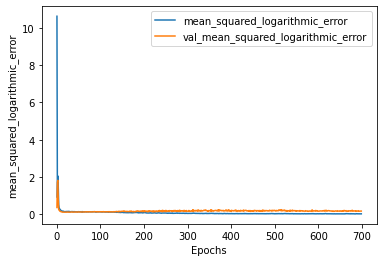

In [43]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [44]:
x_test['prediction'] = model.predict(x_test_scaled)

In [45]:
x_test

,0,1,2,3,4,5,6,7,8,9,prediction
0,0.034443,-0.044642,-0.007284,0.014987,-0.044223,-0.037326,-0.002903,-0.039493,-0.021394,0.007207,153.381775
1,0.074401,0.050680,-0.020218,0.045972,0.074108,0.032819,-0.036038,0.071210,0.106354,0.036201,198.851456
2,0.034443,0.050680,-0.009439,0.059744,-0.035968,-0.007577,-0.076536,0.071210,0.011008,-0.021788,172.102554
3,0.012648,-0.044642,-0.036385,0.042530,-0.013953,0.012934,-0.026833,0.005157,-0.043985,0.007207,124.033386
4,0.016281,-0.044642,0.017506,-0.022885,0.060349,0.044406,0.030232,-0.002592,0.037232,-0.001078,203.299362
...,...,...,...,...,...,...,...,...,...,...,...
84,-0.016412,0.050680,0.127443,0.097616,0.016318,0.017475,-0.021311,0.034309,0.034864,0.003064,274.520111
85,0.045341,-0.044642,0.051996,-0.053871,0.063101,0.064760,-0.010266,0.034309,0.037232,0.019633,137.626724
86,-0.038207,-0.044642,0.067085,-0.060757,-0.029088,-0.023234,-0.010266,-0.002592,-0.001499,0.019633,66.095764
87,0.041708,-0.044642,-0.032073,-0.061904,0.079612,0.050982,0.056003,-0.009972,0.045066,-0.059067,180.462555


In [56]:
y_test = np.transpose(y_test)

In [57]:
y_test

,0
0,155.0
1,241.0
2,257.0
3,50.0
4,128.0
...,...
84,308.0
85,164.0
86,78.0
87,78.0


C:\Users\A\anaconda3\envs\tf_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\A\anaconda3\envs\tf_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Data must be 1-dimensional

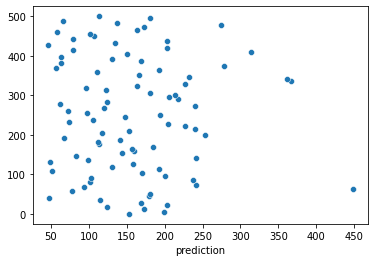

In [70]:
sns.scatterplot(x_test['prediction'],np.linspace(0,500,89))
sns.scatterplot(y_test,np.linspace(0,500,89),color='r')
plt.show()

In [69]:
y_test.shape

(89, 1)

In [68]:
np.reshape(y_test,(89,))


,0
0,155.0
1,241.0
2,257.0
3,50.0
4,128.0
...,...
84,308.0
85,164.0
86,78.0
87,78.0
